In [1]:
import sklearn
# import sklearn_pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn_pandas import DataFrameMapper

In [2]:
cat_feats = ['city', 'bd', 'gender', 'registered_via', 'registration_init_year',
                  'registration_init_month', 'registration_init_date', 'payment_method_id', 'payment_plan_days',
                  'plan_list_price', 'actual_amount_paid', 'is_auto_renew', 'is_cancel',
                  'transaction_date_year', 'transaction_date_month', 'transaction_date_date',
                  'membership_expire_date_year','membership_expire_date_month', 'membership_expire_date_date', 
                  'membership_transaction_gap','cancel_times','auto_renew_count', 'total_order', 
                  'plan_net_worth', 'user_date_year', 'user_date_month','user_date_date']
# train = pd.read_csv('../../data/train.csv', nrows=1000, dtype=dtype)
train = pd.read_csv('../../data/train.csv')

In [3]:
train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_year,registration_init_month,registration_init_date,...,avg_num_25,avg_num_75,avg_num_unq,avg_num_985,logs_count,avg_num_100,user_date_year,user_date_month,user_date_date,msno_hash
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,4.0,2.0,9.0,20050406.0,2005.0,4.0,6.0,...,1.000000,0.000000,2.000000,0.000000,1.0,1.000000,17.0,2.0,8.0,-6037487013696898531
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,4.0,1.0,9.0,20050407.0,2005.0,4.0,7.0,...,0.909091,0.090909,10.909091,0.090909,11.0,13.727273,17.0,2.0,15.0,-5792939595863356240
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,3.0,2.0,9.0,20051016.0,2005.0,10.0,16.0,...,4.000000,0.600000,34.000000,0.800000,5.0,35.400000,17.0,1.0,31.0,6988685342091740087
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,2.0,2.0,9.0,20051102.0,2005.0,11.0,2.0,...,7.066667,1.666667,19.533333,1.266667,15.0,18.533333,17.0,2.0,21.0,824523925267310726
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,3.0,1.0,9.0,20051228.0,2005.0,12.0,28.0,...,1.000000,0.625000,77.937500,3.000000,16.0,41.125000,17.0,2.0,28.0,-6633410660166310311


In [4]:
for col in train.columns:
    train[col] = train[col].astype('object')

In [5]:
train.dtypes

msno                            object
is_churn                        object
city                            object
bd                              object
gender                          object
registered_via                  object
registration_init_time          object
registration_init_year          object
registration_init_month         object
registration_init_date          object
payment_method_id               object
payment_plan_days               object
plan_list_price                 object
actual_amount_paid              object
is_auto_renew                   object
transaction_date                object
membership_expire_date          object
is_cancel                       object
transaction_date_year           object
transaction_date_month          object
transaction_date_date           object
membership_expire_date_year     object
membership_expire_date_month    object
membership_expire_date_date     object
trans_count                     object
membership_transaction_ga

In [ ]:

['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_year',
       'registration_init_month', 'registration_init_date',
       'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel', 'transaction_date_year',
       'transaction_date_month', 'transaction_date_date',
       'membership_expire_date_year', 'membership_expire_date_month',
       'membership_expire_date_date', 'trans_count',
       'membership_transaction_gap', 'discount', 'is_discount', 'amt_per_day',
       'autorenew_&_not_cancel', 'notAutorenew_&_cancel', 'total_order',
       'cancel_times', 'total_actual_payment', 'plan_net_worth',
       'auto_renew_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'avg_num_25', 'logs_count', 'avg_num_unq',
       'avg_num_985', 'avg_total_secs', 'avg_num_50', 'avg_num_100',
       'avg_num_75', 'user_date_year', 'user_date_month', 'user_date_date',
       'msno_hash']

In [6]:
train.columns

Index(['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_year',
       'registration_init_month', 'registration_init_date',
       'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel', 'transaction_date_year',
       'transaction_date_month', 'transaction_date_date',
       'membership_expire_date_year', 'membership_expire_date_month',
       'membership_expire_date_date', 'trans_count',
       'membership_transaction_gap', 'discount', 'is_discount', 'amt_per_day',
       'autorenew_&_not_cancel', 'notAutorenew_&_cancel', 'total_order',
       'cancel_times', 'total_actual_payment', 'plan_net_worth',
       'auto_renew_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'avg_num_50', 'avg_total_secs', 'avg_num_25',
       'avg_num_75', 'avg_num_unq', 'avg_num_985', '

In [7]:
len(train)

992931

In [8]:
train.count()

msno                            992931
is_churn                        992931
city                            877161
bd                              877161
gender                          877161
registered_via                  877161
registration_init_time          877161
registration_init_year          877161
registration_init_month         877161
registration_init_date          877161
payment_method_id               992931
payment_plan_days               992931
plan_list_price                 992931
actual_amount_paid              992931
is_auto_renew                   992931
transaction_date                992931
membership_expire_date          992931
is_cancel                       992931
transaction_date_year           992931
transaction_date_month          992931
transaction_date_date           992931
membership_expire_date_year     992931
membership_expire_date_month    992931
membership_expire_date_date     992931
trans_count                     992931
membership_transaction_ga

In [32]:
# train.dtypes

In [9]:
# 统计分类变量信息
train.describe()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_year,registration_init_month,registration_init_date,...,avg_num_25,avg_num_75,avg_num_unq,avg_num_985,logs_count,avg_num_100,user_date_year,user_date_month,user_date_date,msno_hash
count,992931,992931,877161.0,877161.0,877161.0,877161.0,877161.0,877161.0,877161.0,877161.0,...,869926.0,869926.0,869926.0,869926.0,869926.0,869926.0,869926.0,869926.0,869926.0,992931
unique,992931,2,21.0,13.0,3.0,5.0,4724.0,14.0,12.0,31.0,...,4477.0,1045.0,10516.0,1407.0,17.0,10884.0,3.0,12.0,31.0,992931
top,bLbvPuZ9y73CwLtcAli0hVWqua9Q1tCKUb5v1GDZeIA=,0,1.0,0.0,0.0,7.0,20151009.0,2016.0,1.0,6.0,...,0.0,0.0,1.0,0.0,1.0,0.0,17.0,2.0,28.0,-3585764022548673934
freq,1,929460,455389.0,487664.0,485469.0,482726.0,1577.0,206892.0,93707.0,30213.0,...,64325.0,193350.0,26029.0,193018.0,155444.0,36924.0,796009.0,766319.0,426539.0,1


In [10]:
# 统计数值变量信息
# train.describe(include=['number'])

In [10]:
train.drop(['msno', 'msno_hash'], axis=1, inplace=True)

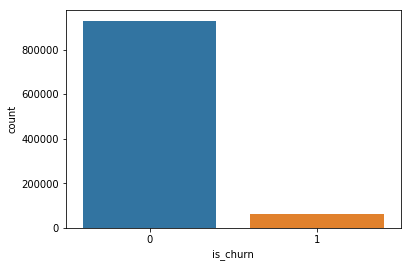

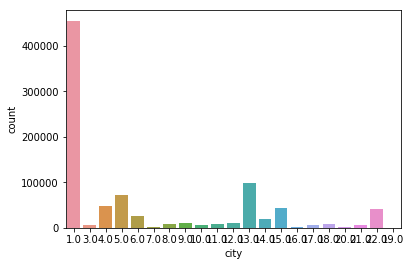

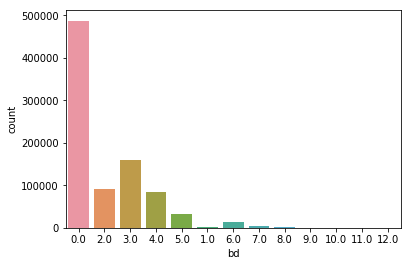

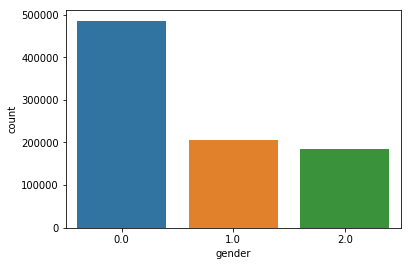

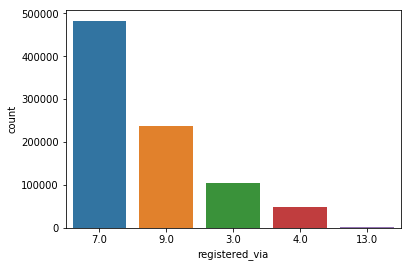

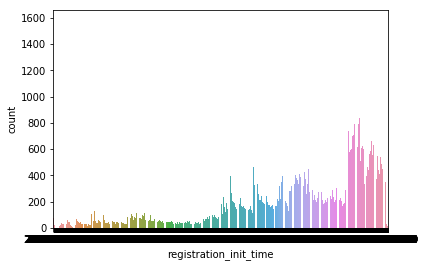

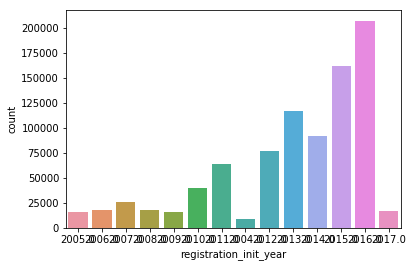

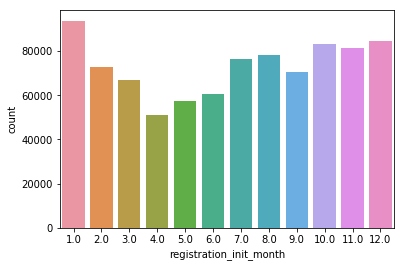

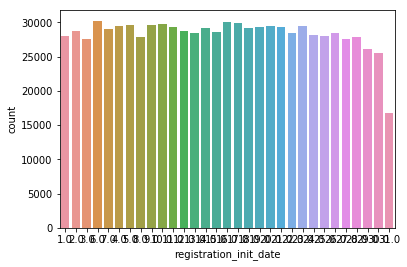

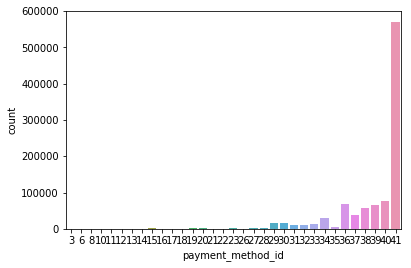

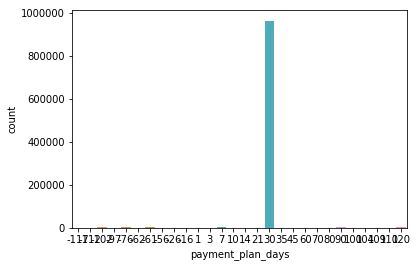

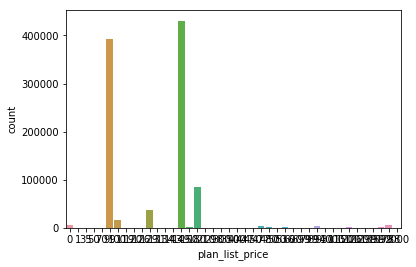

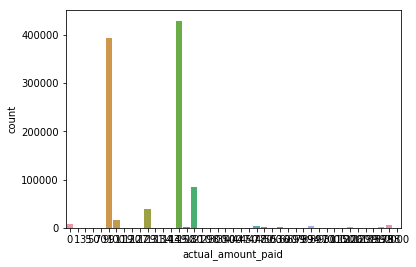

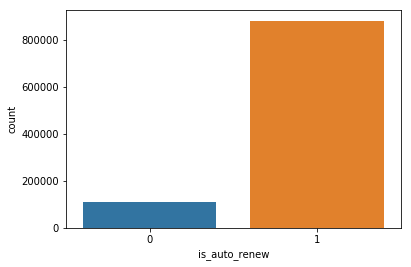

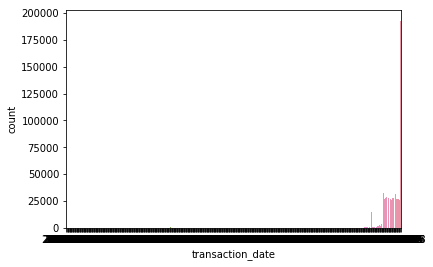

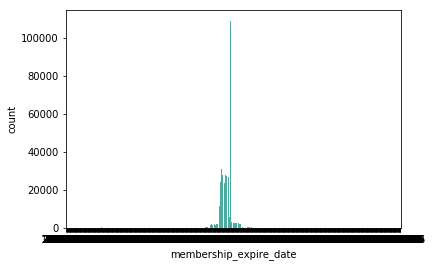

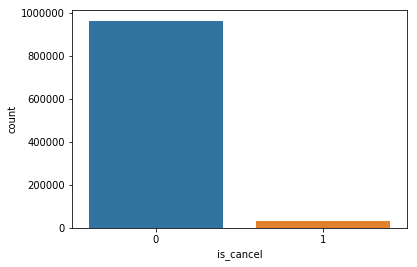

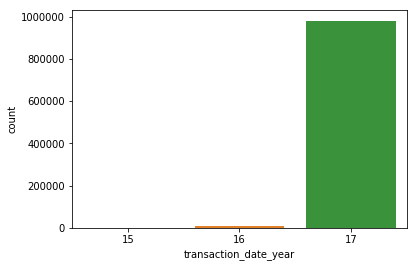

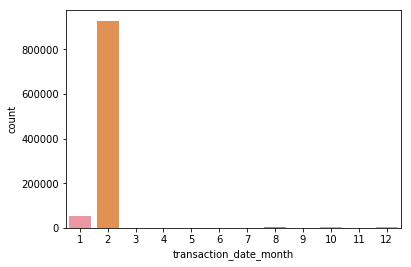

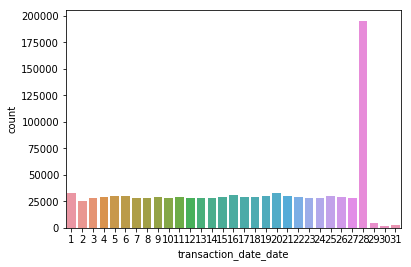

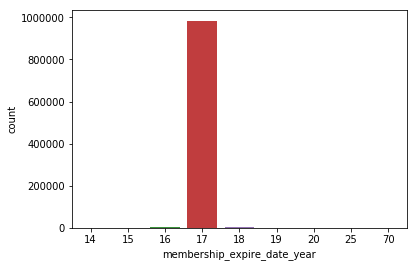

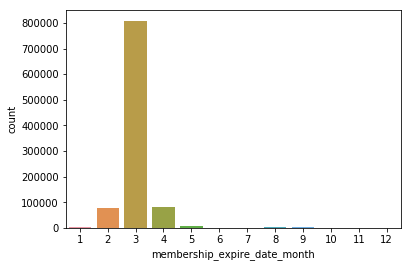

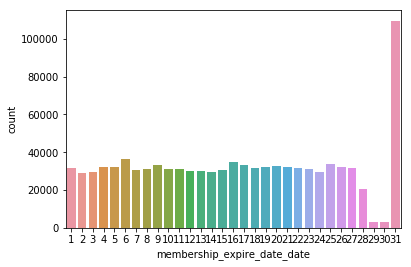

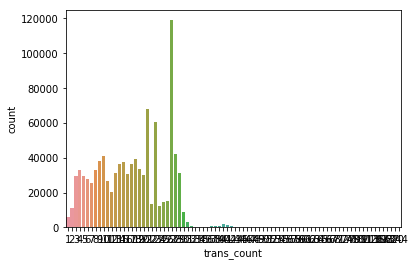

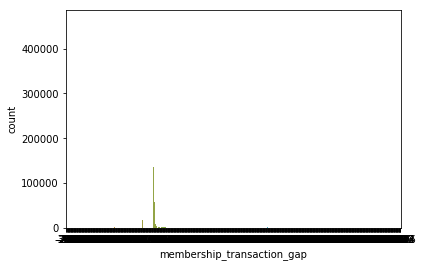

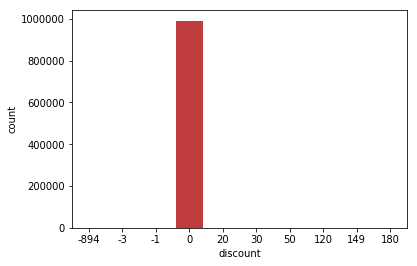

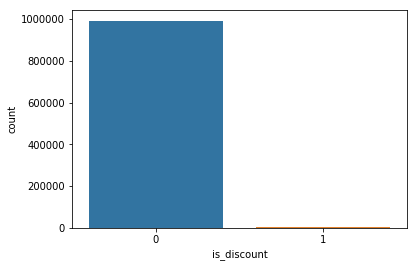

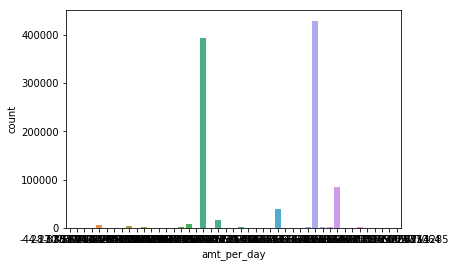

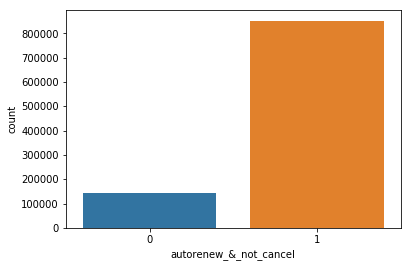

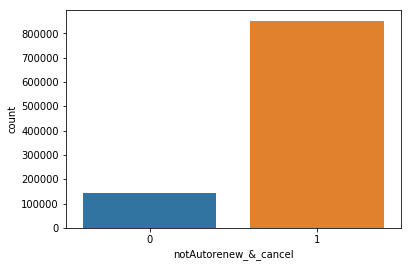

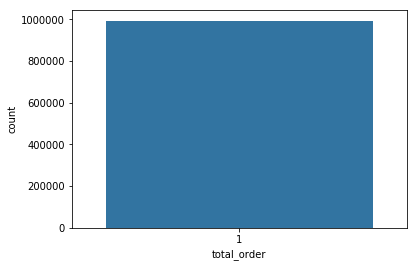

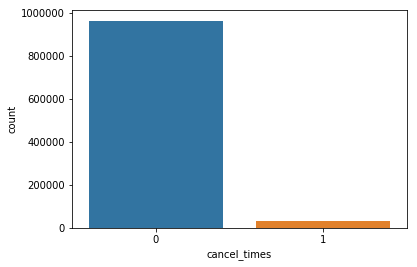

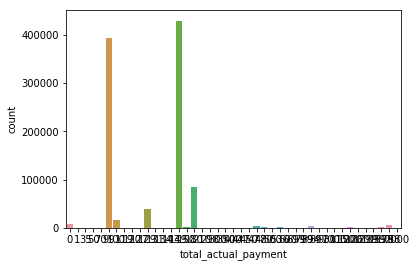

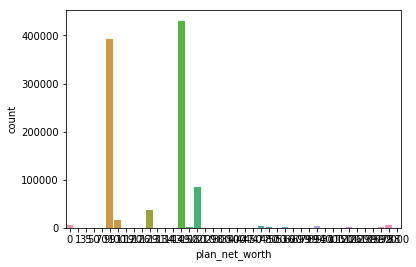

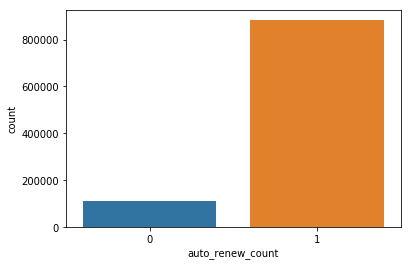

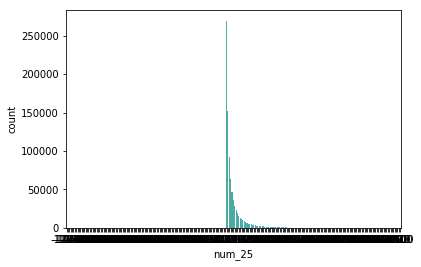

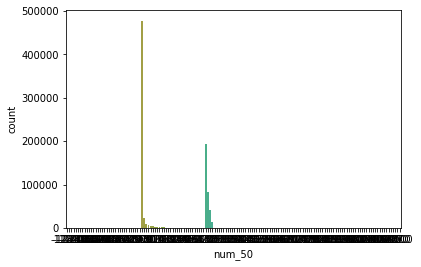

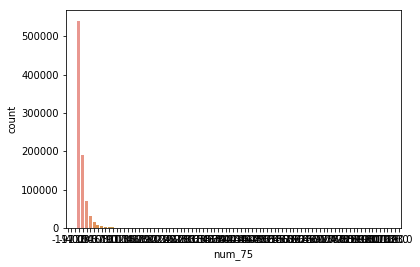

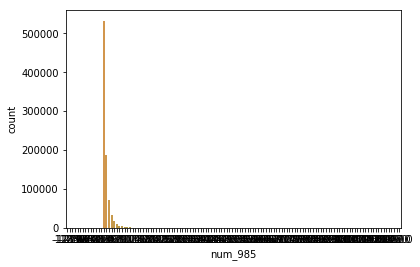

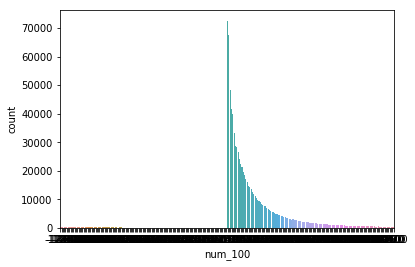

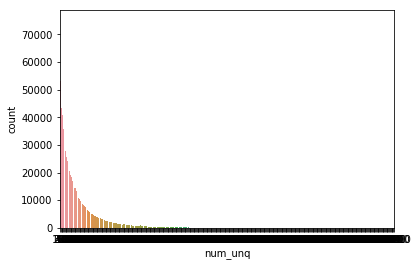

In [ ]:
# 画图查看分类变量的分布

categorical_feature = train.dtypes[train.dtypes == 'object'].index
for feature in categorical_feature:
    sns.countplot(x=train[feature], data=train)
    plt.show()

In [69]:
cnv_data = train[train['is_churn']=='1']

In [70]:
cnv_data.head()

,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,age,gender,education,...,hometown,residence,sitesetID,positionType,adID,camgaignID,advertiserID,appID,appPlatform,appCategory
145,1,00,2137,703736,2579,1,1,5,1,1,...,415,415,1,0,2148,179,84,360,1,201
147,1,00,3981,2030308,2579,2,1,4,2,1,...,0,1503,1,0,2924,513,44,421,1,104
187,1,00,3584,936876,3322,2,3,3,1,4,...,903,903,1,0,1349,32,8,84,2,402
191,1,00,2137,2619571,2579,1,2,4,1,2,...,1003,201,1,0,2148,179,84,360,1,201
247,1,00,2137,1411484,2579,1,2,4,1,3,...,506,506,1,0,2148,179,84,360,1,201


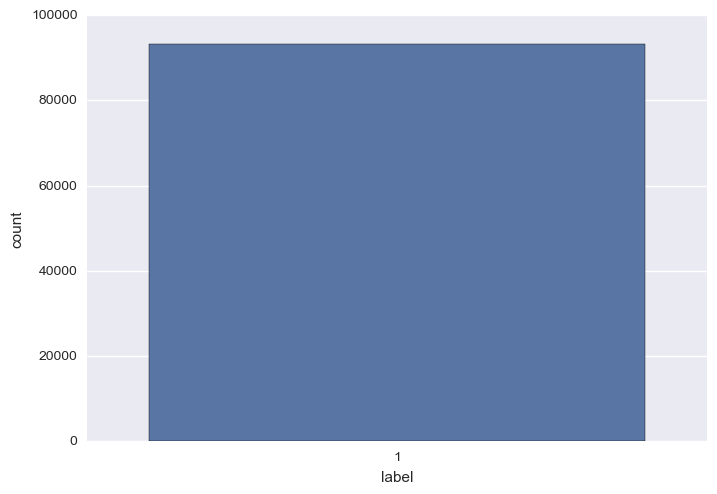

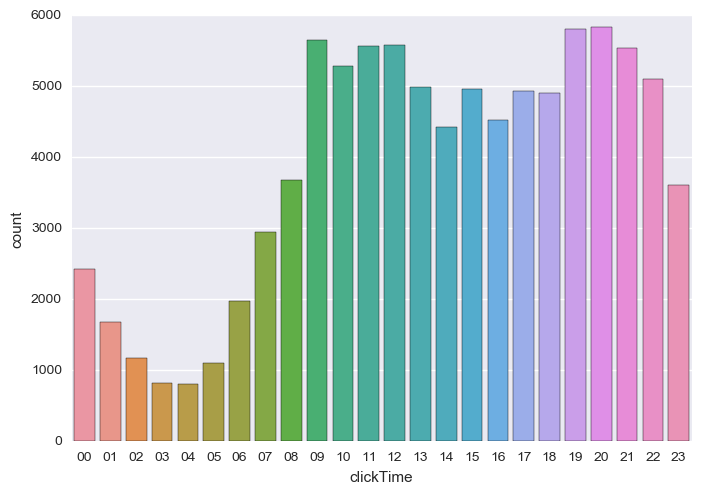

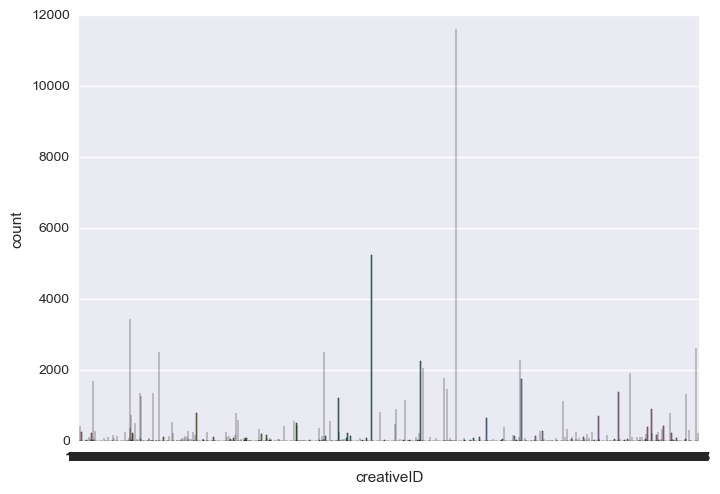

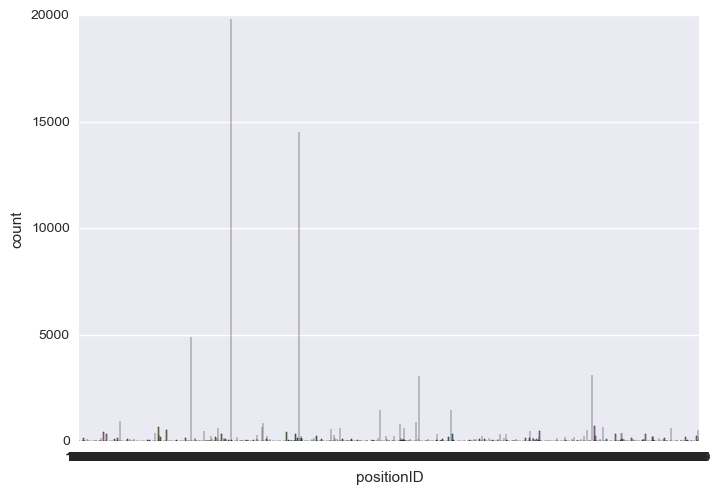

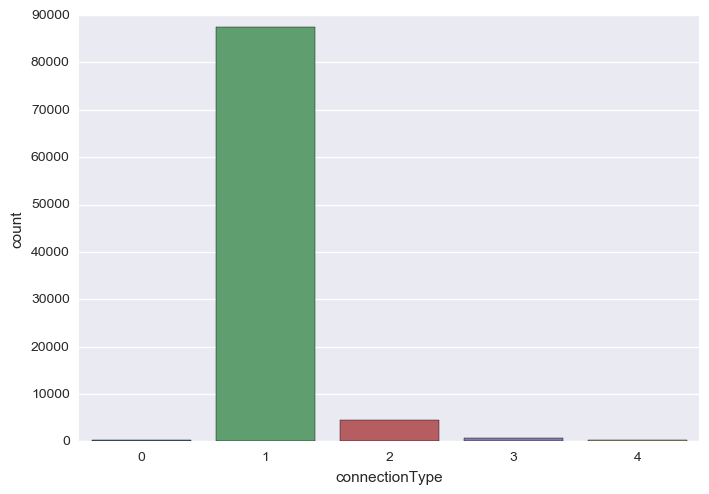

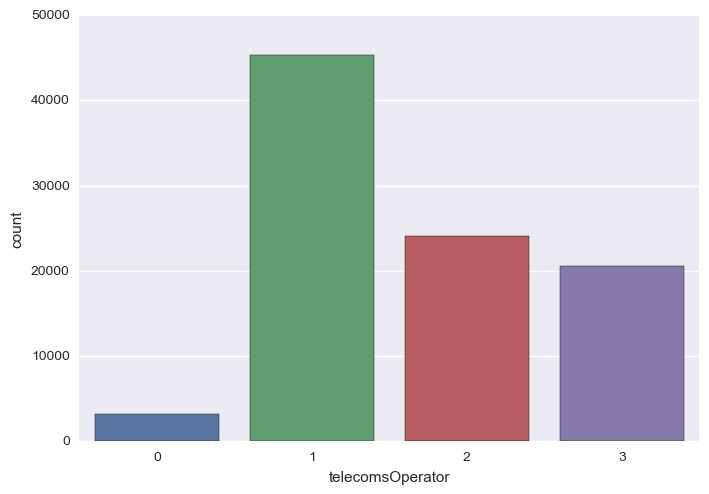

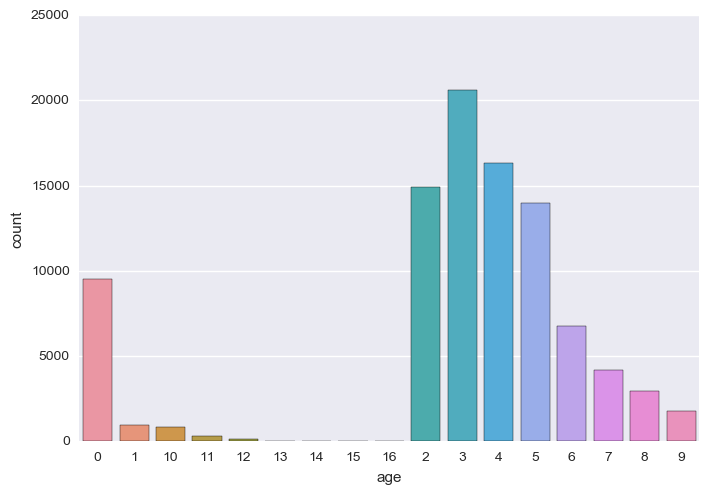

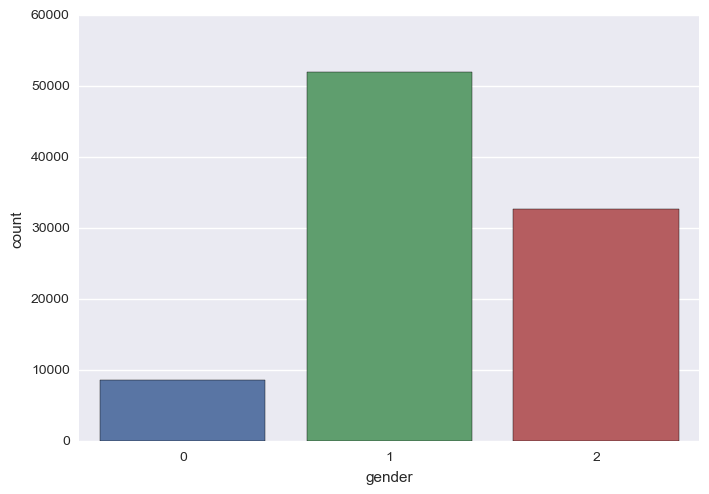

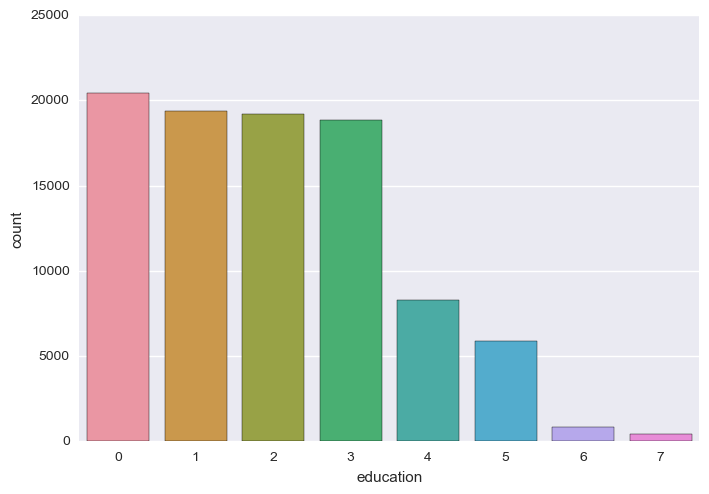

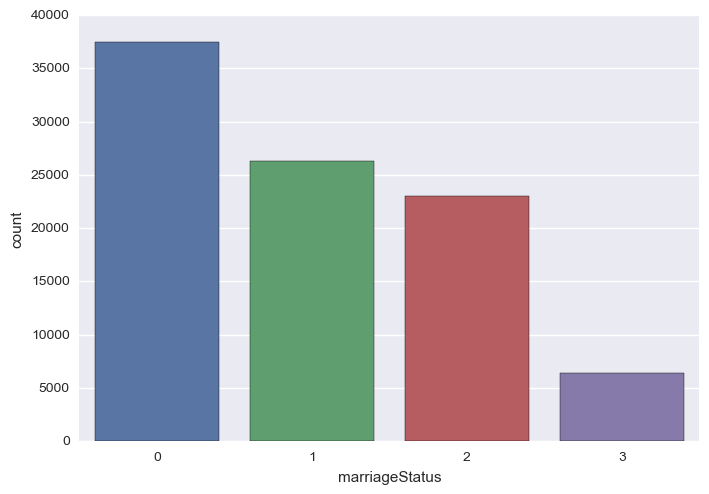

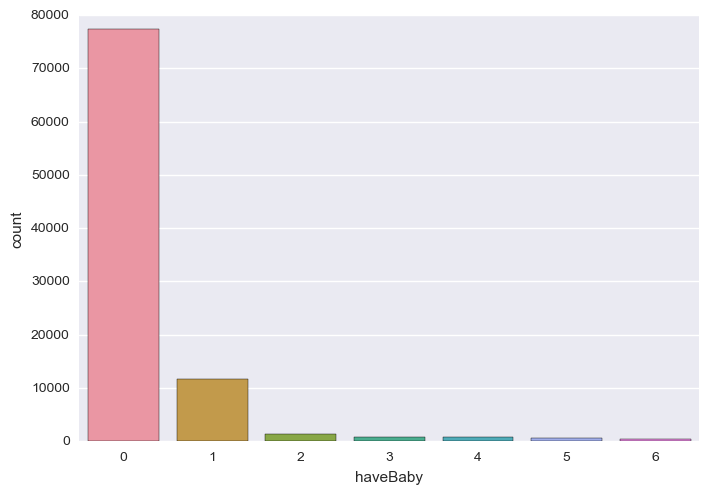

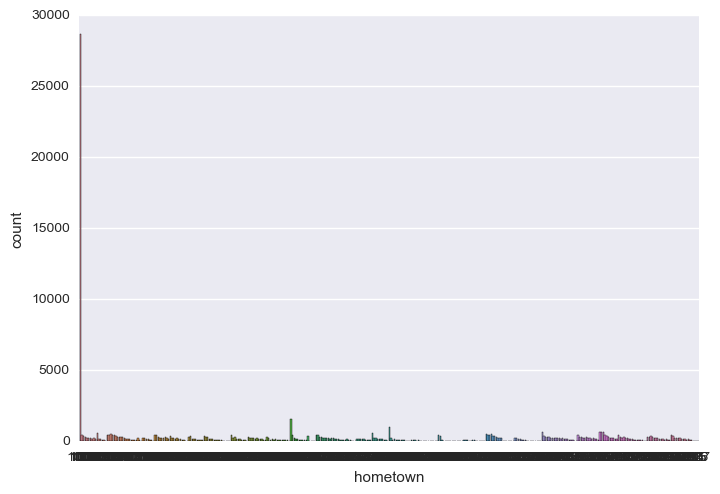

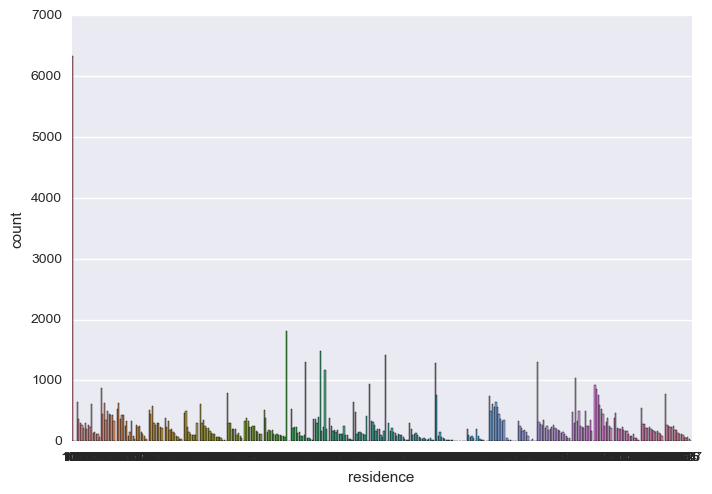

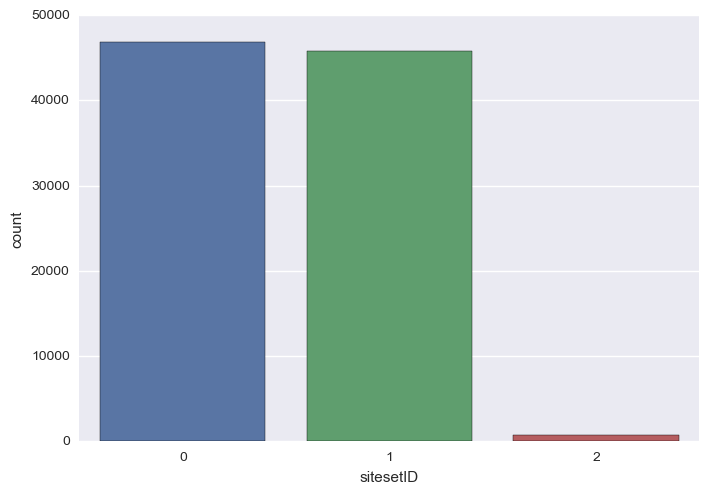

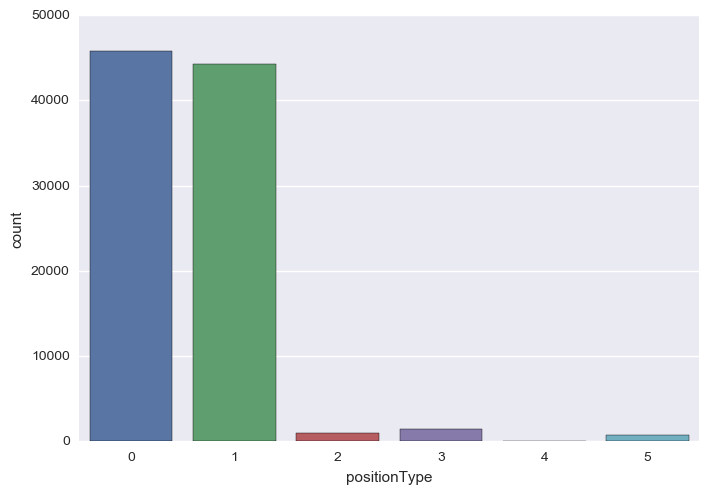

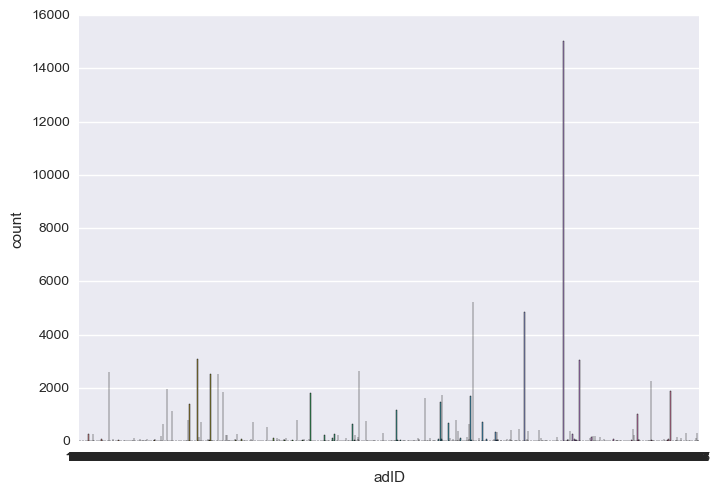

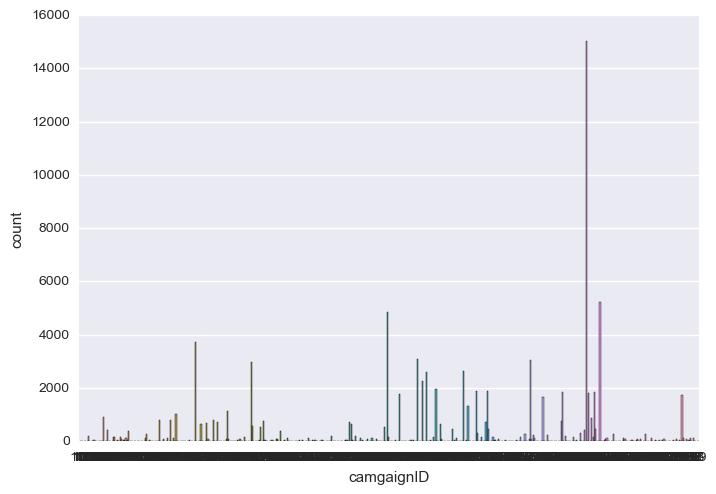

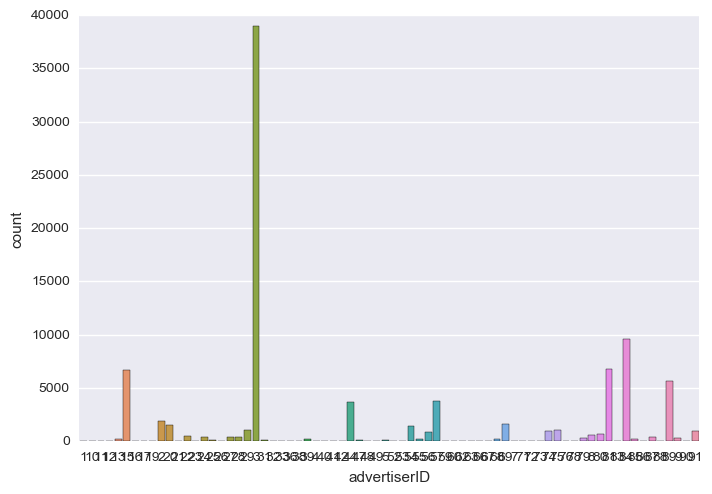

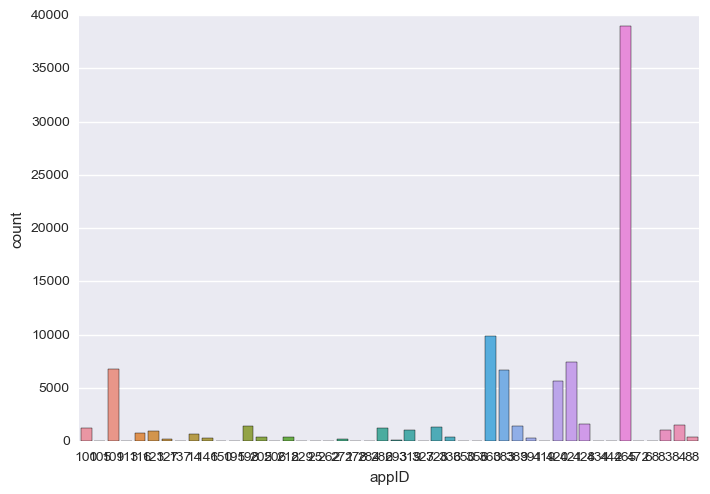

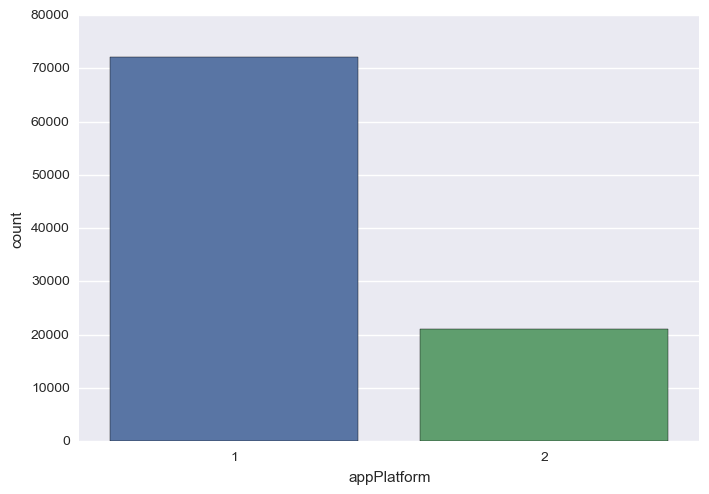

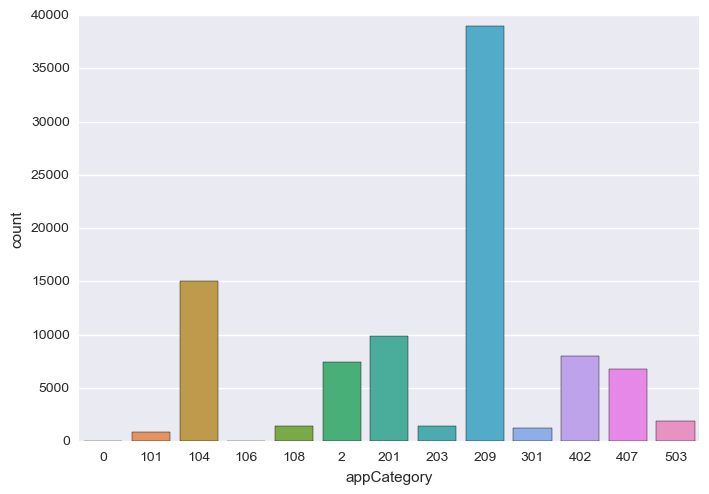

In [19]:
# 画图查看分类变量的分布

categorical_feature = cnv_data.dtypes[cnv_data.dtypes == 'object'].index
for feature in categorical_feature:
    sns.countplot(x=cnv_data[feature], data=cnv_data)
    plt.show()

In [71]:
cnv_data.describe()

,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,age,gender,education,...,hometown,residence,sitesetID,positionType,adID,camgaignID,advertiserID,appID,appPlatform,appCategory
count,93261,93261,93261,93261,93261,93261,93261,93261,93261,93261,...,93261,93261,93261,93261,93261,93261,93261,93261,93261,93261
unique,1,24,1981,92051,1746,5,4,17,3,8,...,365,388,3,6,1467,446,72,46,2,13
top,1,20,4565,2676800,2579,1,1,3,1,0,...,0,0,0,0,3593,632,3,465,1,209
freq,93261,5826,11622,11,19825,87555,45370,20597,51955,20445,...,28655,6327,46833,45740,15023,15023,38962,38962,72124,38962
